# 4. 개별 종목 일별 시세 수집 및 시각화

## 4.1 라이브러리 불러오기

In [7]:
import pandas as pd
import FinanceDataReader as fdr
import warnings
warnings.filterwarnings('ignore')

<br>

## 4.2 일별 시세 수집

- 종목 코드로 수집 가능
- 종목명을 찾아서 일별 시세를 수집해주는 함수 구현

<br>

### 4.2.1 삼성전자 일별 시세 가져오기

In [6]:
df = fdr.DataReader('005930', start='2017', end='2021')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998


<AxesSubplot:xlabel='Date'>

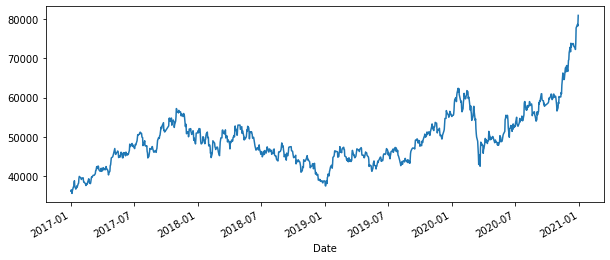

In [11]:
df['Close'].plot(figsize=(10,4))

<br>

### 4.2.2 상장종목 목록 가져오기

In [13]:
df_krx = pd.read_csv('krx.csv')
df_krx.shape

(2614, 10)

In [14]:
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


<br>

### 4.2.3 종목명과 종목코드 추출하기

In [16]:
df_krx[['Symbol', 'Name']].head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


<br>

### 4.2.4 '빅히트' 종목코드 찾기

In [31]:
item_name = '빅히트'
df_krx.loc[df_krx['Name'] == item_name, 'Symbol'].tolist()[0]

'352820'

<br>

### 4.2.5 종목명 입력 시 종목코드를 반환하는 함수 구현

In [39]:
def item_code_by_item_name(item_name):
    # docstring 정의 (?로 함수 설정 볼 때 표출되는 내용)
    """
    종목명을 받아 종목코드를 찾아 반환하는 함수
    """
    item_code_list = df_krx.loc[df_krx['Name'] == item_name, 'Symbol'].tolist()
    if len(item_code_list) > 0:
        return item_code_list[0]
    else:
        return False

In [42]:
item_code_by_item_name('빅히트')

'352820'

In [44]:
item_code_by_item_name('네이버')

False

In [45]:
item_code_by_item_name('NAVER')

'035420'

In [46]:
item_code_by_item_name('삼성전자')

'005930'

In [47]:
item_code_by_item_name('셀트리온')

'068270'

<br>

### 4.2.6 구현한 함수를 이용해 일별 시세 가져오기

In [48]:
fdr.DataReader(item_code_by_item_name('삼성전자'))

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-02-11,960,972,942,973,130180,NaN
1997-02-12,967,1022,964,1001,241110,0.028777
1997-02-13,1004,1081,1004,1049,323720,0.047952
1997-02-14,1058,1084,1049,1058,187570,0.008580
1997-02-15,1067,1076,1036,1041,77700,-0.016068
...,...,...,...,...,...,...
2021-01-15,89800,91800,88000,88000,33431809,-0.018952
2021-01-18,86600,87300,84100,85000,43227951,-0.034091
2021-01-19,84500,88000,83600,87000,39895044,0.023529


<br>

### 4.2.7 종목명으로 일별시세를 받아오는 함수 구현

In [56]:
def find_item_list(item_name, year=2020):
    """
    종목명을 넘겨주면 일별시세를 반환하는 함수
    내부에서 종목명으로 종목코드를 반환하는 함수(item_code_by_item_name)로 종목의 시세를 수집한다.
    """
    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code, start=str(year))
        return df_day
    else:
        return False

In [57]:
find_item_list('삼성전자')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2021-01-18,86600,87300,84100,85000,43227951,-0.034091
2021-01-19,84500,88000,83600,87000,39895044,0.023529
2021-01-20,89000,89000,86500,87200,25211127,0.002299


In [58]:
find_item_list('삼성')

False

In [59]:
find_item_list('네이버')

False

In [60]:
find_item_list('NAVER', 2015)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,142802,146808,142602,146408,64225,0.026690
2015-01-05,145406,150213,144404,150013,112572,0.024623
2015-01-06,148410,151014,147208,148811,92315,-0.008013
2015-01-07,150012,150012,146207,146608,51987,-0.014804
2015-01-08,146007,149211,146007,149011,56392,0.016391
...,...,...,...,...,...,...
2021-01-18,304500,308500,300000,300500,864969,-0.017974
2021-01-19,303500,310500,299500,308000,880238,0.024958
2021-01-20,313500,313500,302000,308000,885472,0.000000


In [61]:
find_item_list('빅히트')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,270000,351000,253500,258000,6557212,NaN
2020-10-16,253000,253000,199000,200500,4504395,-0.222868
2020-10-19,198500,202500,187000,189000,1977996,-0.057357
2020-10-20,190000,193500,176000,182500,1811616,-0.034392
2020-10-21,180500,185500,177000,179000,1658643,-0.019178
...,...,...,...,...,...,...
2021-01-18,156000,168500,154500,165500,630687,0.054140
2021-01-19,168000,174500,167000,173500,459733,0.048338
2021-01-20,174000,177000,169000,176000,423998,0.014409
